# Анализ рынка компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# План работы

1. Загрузка данных;
2. Предобработка данных;
3. Исследовательский анализ;
4. Портреты пользователей;
5. Проверка гипотез;
6. Общий вывод.

# Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board).* Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Загрузка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

Загрузим данные из файла в переменную `data`

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<font size=3> Вывод: </font>

1. В датасете 16715 строк и 11 столбцов;
2. Типы данных: `object`, `float64`;
3. Все названия столбцов некорректно записаны;
4. В некоторых стобцах пропущенные значения.

## Предобработка данных

### Названия стобцов

Выведем названия столбцов и изменим их

In [5]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
data.columns = [x.lower() for x in data.columns]

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим строки с пропусками в стобце `name`. Их всего 2, поэтому это не помешает в дальнейшем.

In [9]:
data.dropna(subset=['name'], inplace=True)

Проверим процентное соотношение пропущенных данных в `year_of_release`

In [10]:
convers = data['year_of_release'].isna().mean()
print('Доля от общего числа: {:.1%}'.format(convers))

Доля от общего числа: 1.6%


In [11]:
data.query('year_of_release.isna()')[['na_sales', 'eu_sales', 'jp_sales']].sum()

na_sales    59.15
eu_sales    24.46
jp_sales     6.70
dtype: float64

Продаж на 90 млн копий

Удалим пропуски в `year_of_release`

In [12]:
data.dropna(subset=['year_of_release'], inplace=True)

<div class="alert alert-warning", style="border:solid coral 3px; padding: 20px">
<font size="4", color = "DimGrey"><b>⚠️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />Решение верное, перед удалением стоит посмотреть на записи — может они по 100 млн. продаж принесли ...
        
На этом проекте мы работаем с продажами, поэтому включается другой фактор, кроме процента потерь ...        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br />
    <font size="3", color = "black">
<br /> Собственно, так и вышло - 90 млн копий. Стоит ли после этого оставить эти данные?
        

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br />
    <font size="3", color = "black">
<br />
        
        Стоит ли после этого оставить эти данные?
        
Нет, твое  решение об удалении было верное. Общий объем продаж составляет примерно 9 млрд.

Что касается `critic_score`, `user_score` и `rating` - здесь большое количество пропущенных данных. Это может быть связано с тем, что не все игры оценивались критиками в виду их непопулярности, а игроки так вообще редко это делают. Смысла удалять эти данные нет, так как это исказит исследование.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br />
    <font size="3", color = "black">
<br />
Верное решение

### Преобразование типов данных

В столбце `year_of_release` изменим тип данных на `int64`. В `critic_score` тип данных `float`, хотя числа все целые - оценки по стобальной шкале

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('Int64')

Что касается аббревиатуры `tbd` (To Be Determined) - используется, если какая-то информация еще не определена или решение по вопросу не принято. Можем заменить на NaN

In [14]:
data['user_score'] = data['user_score'].replace({'tbd': np.NaN})

In [15]:
data['user_score'] = data['user_score'].astype('float')

В столбце `rating` пропущенные данные заполним строкой "no_rating"

In [16]:
data['rating'] = data['rating'].fillna('no_rating')

Посмотрим количество дубликатов, и, если они присутсвуют, удалим их.

In [17]:
print('Количество дубликатов:',
      data.duplicated(subset=['name', 'platform', 'year_of_release']).sum())

Количество дубликатов: 1


In [18]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])

In [19]:
print('Количество дубликатов:',
      data.duplicated(subset=['name', 'platform', 'year_of_release']).sum())

Количество дубликатов: 0


### Добавление столбца

По заданию добавим новый столбец `total_sales` - общие продажи игры во всех странах.

In [20]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<ipython-input-20-ed592ade0c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


<font size=3> Вывод: </font>

1. Названия всех столбов приведены к нижнему регистру;
2. Обработаны пропуски там, где это возможно (`name` и `year_of_release`);
3. Преобразованы типы данных в столбцах `year_of_release`, `critic_score`, `user_score`;
4. Дубликаты удалены;
5. Добавлен новый столбец `total_sales` - общее количество продаж.

## Исследовательский анализ

### Сколько игр выпускалось в разные годы?

Построим сводную таблицу и стобчатую диаграмму:

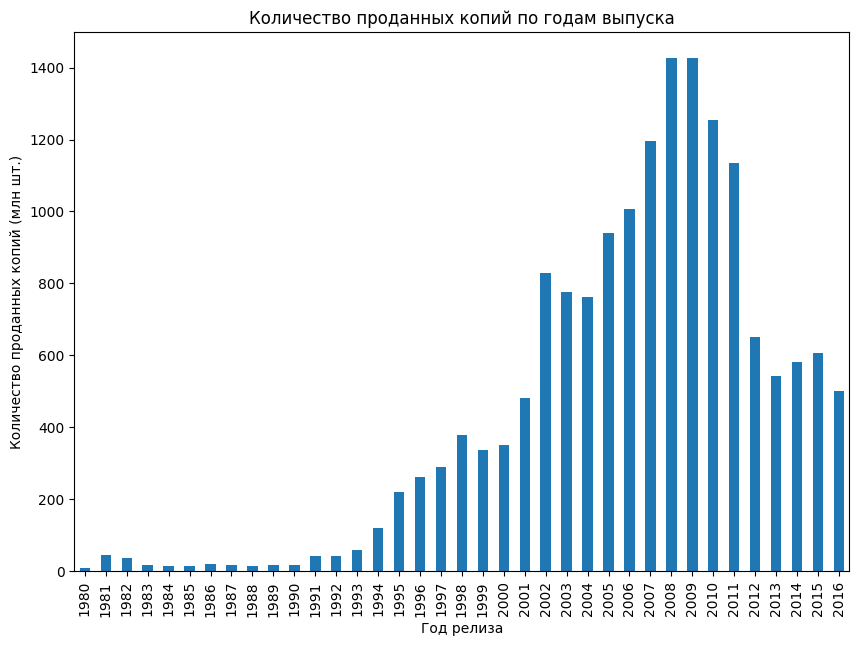

In [22]:
(
data.pivot_table
    (
    index='year_of_release',
    values='name',
    aggfunc='count'
    )
    .plot
        (
        kind='bar',
        figsize=(10, 7),
        title='Количество проданных копий по годам выпуска',
        ylabel='Количество проданных копий (млн шт.)',
        xlabel='Год релиза',
        legend=False
        )
);

Видим, что количество выпущенных игр стало заметно больше начиная с 1994 года. Пики значений приходятся на 2008 и 2009 годы.

### Продажи по платформам

Построим столбчатую диаграмму продаж по платформам. Возьмем топ-7.

In [23]:
top_platforms = data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum').sort_values(
                    'total_sales',
                    ascending=False).head(7)

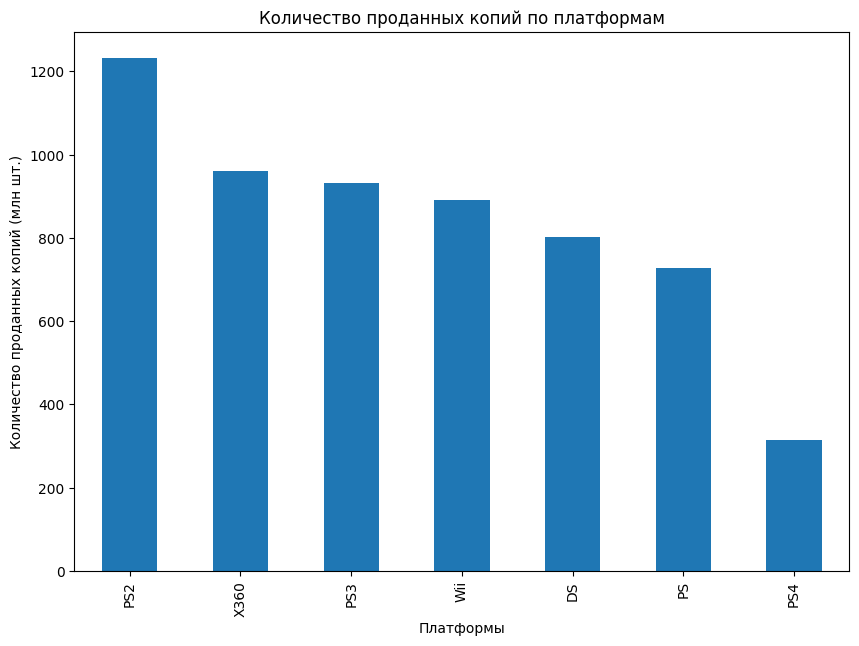

In [24]:
top_platforms.plot(
    kind='bar',
    figsize=(10, 7),
    xlabel='Платформы',
    ylabel='Количество проданных копий (млн шт.)',
    legend=False,
    title='Количество проданных копий по платформам'
);

Самыми популярными платформами оказались PlayStation 2, Xbox 360 и PlayStation 3

In [25]:
platforms = []
for plat in top_platforms.index:
    platforms.append(plat)
platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4']

In [26]:
data.loc[data['platform'].isin(platforms)].pivot_table(
    index='year_of_release',
    values='total_sales',
    columns='platform',
    aggfunc='sum')

platform,DS,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN,NaN


Можно заметить выброс у платформы DS в 1985 году. Сама платформа была выпущена в 2004 году. Удалим выброс

In [27]:
data = data[data['year_of_release'] != 1985]

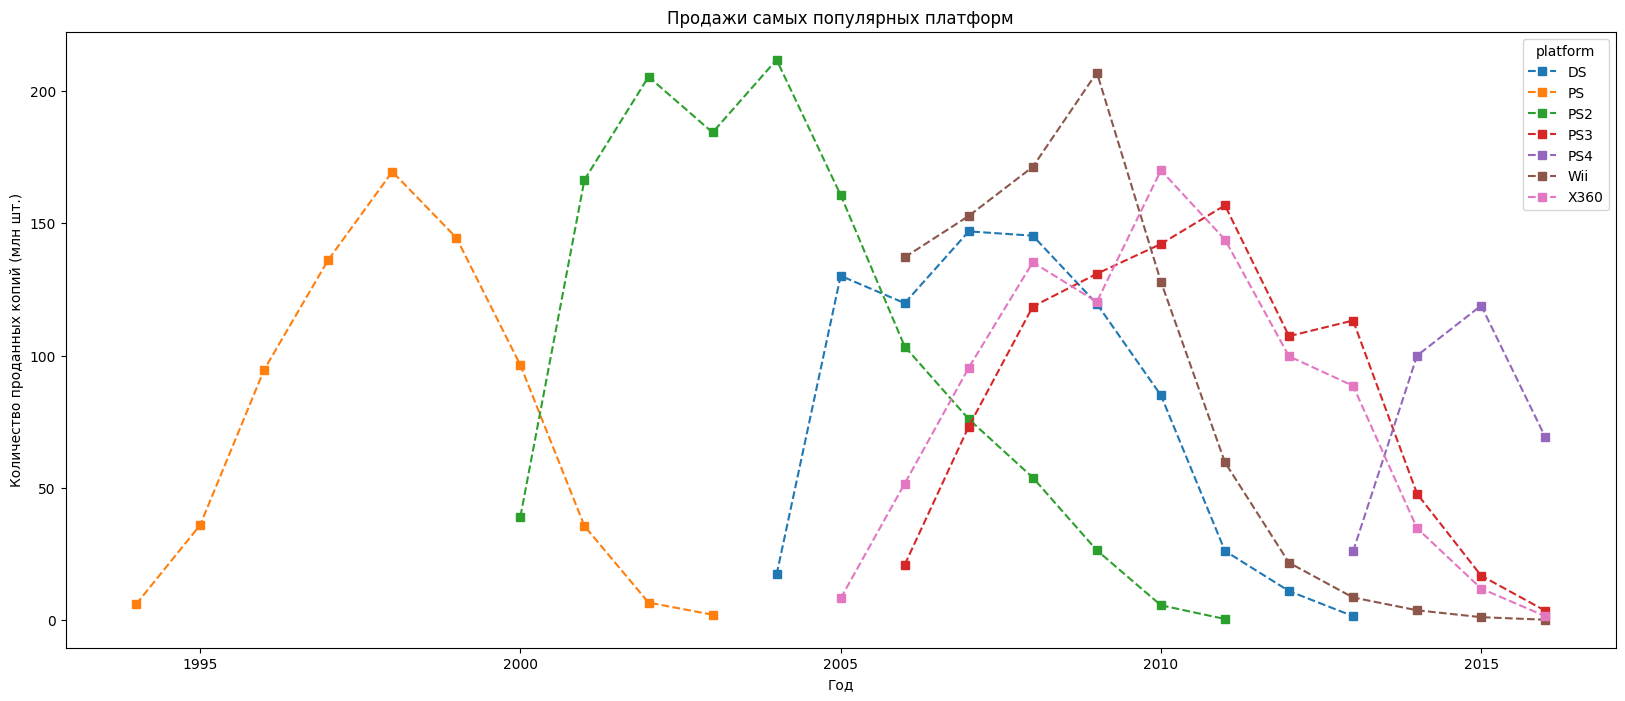

In [28]:
(data
 .loc[data['platform'].isin(platforms)]
 .pivot_table(
    index='year_of_release',
    values='total_sales',
    columns='platform',
    aggfunc='sum')
 .plot(figsize=(20,8), ls = '--', marker = 's',
       xlabel='Год', ylabel='Количество проданных копий (млн шт.)', title='Продажи самых популярных платформ')
);

В основном, новые платформы появляются каждые 5 лет, характерный срок "жизни" платформы составляет около 10-12 лет. Также можно заметить, что действующих (на момент 2016 года) платформ осталось не так много. Актуальными будем считать данные с 2013 года, потому что старое поколение консолей (PS3, Xbox 360) заменяются новым (PS4, XOne).

In [29]:
relevant_data = data.query('year_of_release >= 2014')

### Лидеры продаж

Построим сводную таблицу лидеров продаж и график к ней, но уже за актуальный период.

In [30]:
top_platforms = relevant_data.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum').sort_values(
                    'total_sales',
                    ascending=False).head(10)

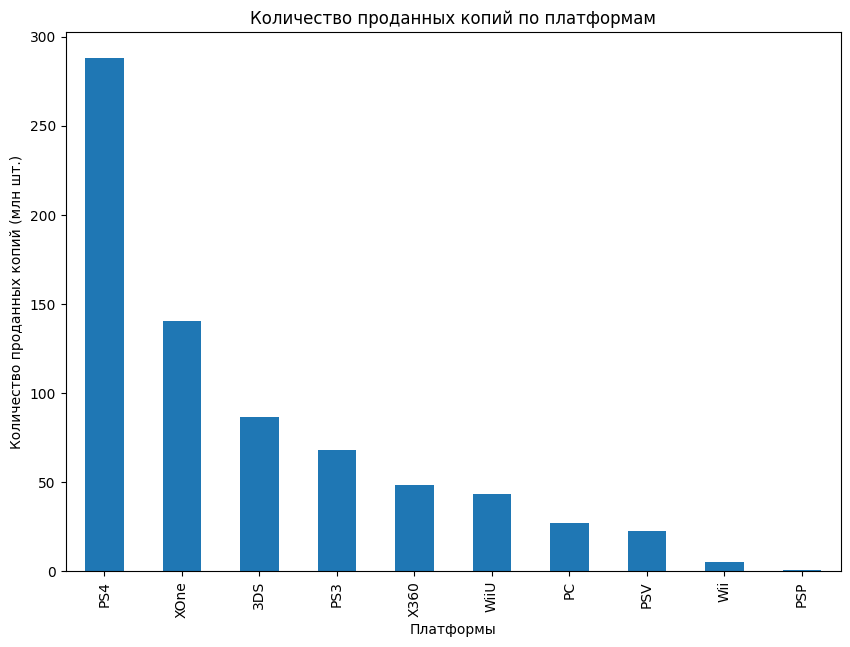

In [31]:
top_platforms.plot(
    kind='bar',
    figsize=(10, 7),
    xlabel='Платформы',
    ylabel='Количество проданных копий (млн шт.)',
    title='Количество проданных копий по платформам',
    legend=False
);

Как видим, за актуальный период выбились в лидеры PS4 и XOne, новые поколения консолей. Хорошо держатся PS3 и X360. Свою актуальность потеряли Wii и PSP

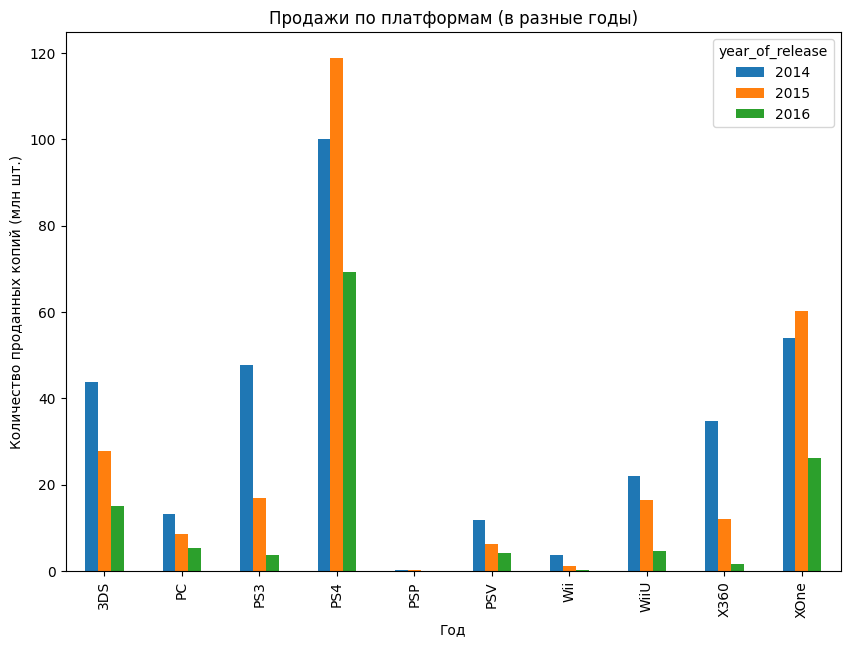

In [32]:
relevant_data.pivot_table(
    index='platform',
    values='total_sales',
    columns='year_of_release',
    aggfunc='sum').plot(
        kind='bar',
        figsize=(10, 7),
        xlabel='Год',
        ylabel='Количество проданных копий (млн шт.)',
        title='Продажи по платформам (в разные годы)');

In [33]:
relevant_data.pivot_table(
    index='platform',
    values='total_sales',
    columns='year_of_release',
    aggfunc='sum')

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


Видно, что за последние 3 года по продажам лидируют PS4 и XOne. У PS4 заметен космический рост - продажи за 2015 превышают продажи за 2013 год почти в 5 раз (с 26 млн копий до 119 млн) - скорее всего это связано с эксклюзивными играми.

Резкий спад продаж наблюдается у PS3 и X360. Продажи 3DS выглядят лучше, чем у PS3.

У платформ PSV, PC и WiiU продажи низкие. У PC это может быть связано с пиратством.

### Построение ящика с усами по продажам

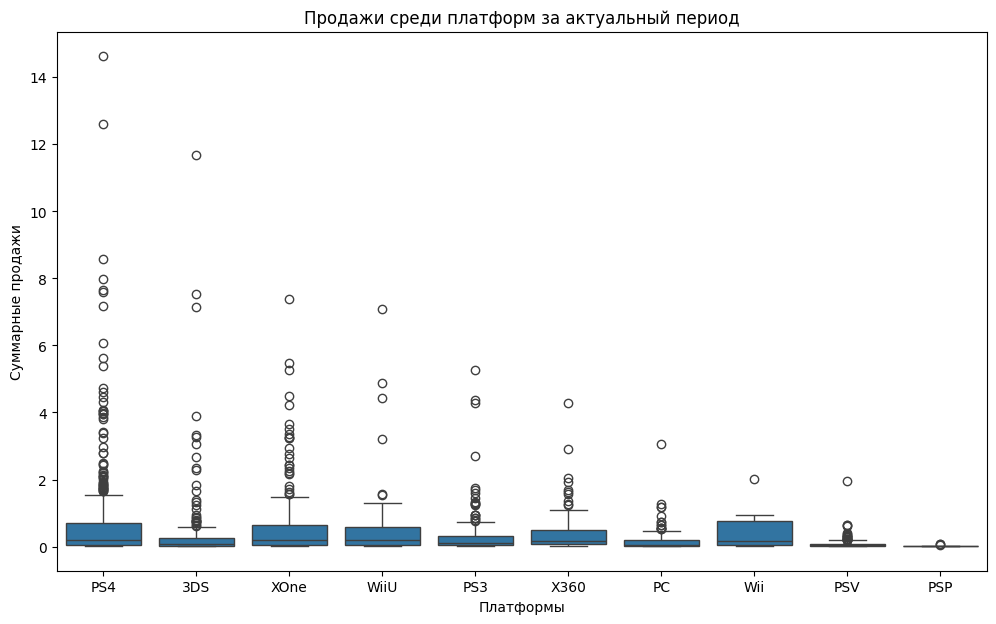

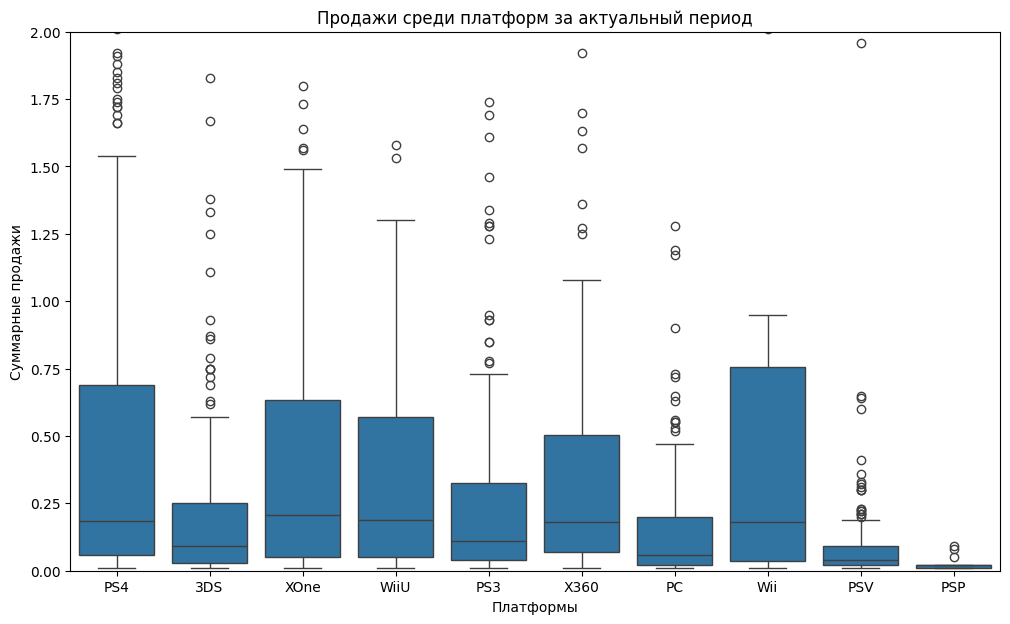

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=relevant_data, x='platform',  y='total_sales')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('Продажи среди платформ за актуальный период')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(data=relevant_data, x='platform',  y='total_sales')
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('Продажи среди платформ за актуальный период')
plt.ylim(0, 2);

Медианы у большинства платформ находятся примерно на одинаковом значении - 0.2 - 0.25 млн копий. Самые крупные межквартильные размахи у PS4, XOne, WiiU.

### Влияние продаж на отзывы пользователей и критиков

Построим для 4 самых популярных платформ диаграммы рассеяния и посчитаем корреляцию:

**PS4**

In [35]:
data_ps4 = relevant_data.query('platform == "PS4"').loc[:,
            ['total_sales', 'critic_score', 'user_score']]
data_ps4.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


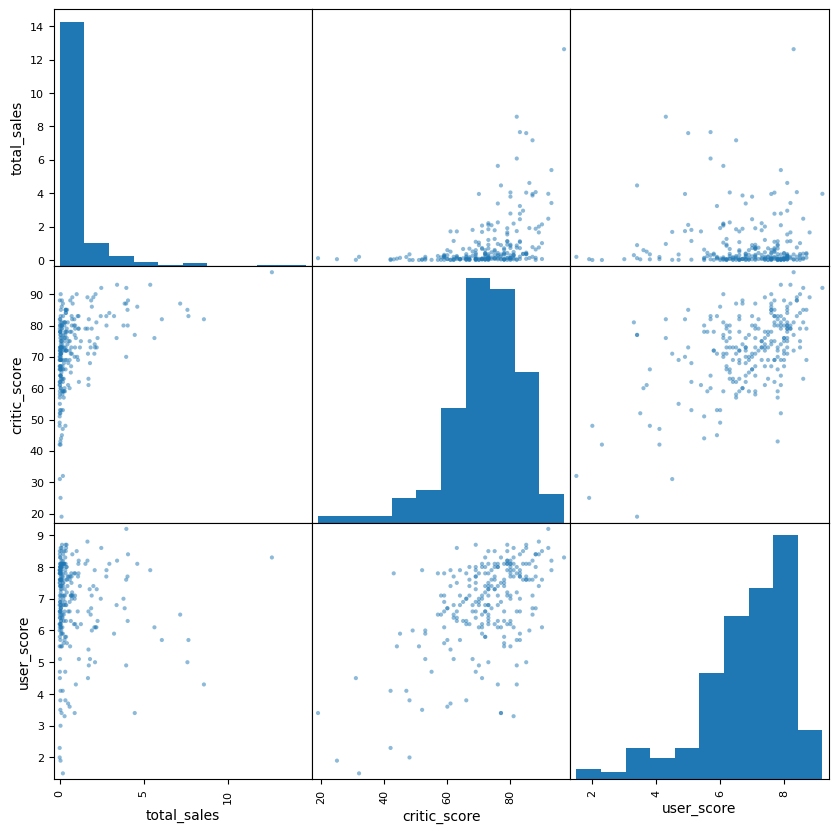

In [36]:
pd.plotting.scatter_matrix(data_ps4, figsize=(10, 10));

В данном примере корреляция наблюдается только между продажами и оценками критиков (40 %). Корреляции между продажами и оценками пользователей нет. Для большей точности проанализируем другие платформы.

**XOne**

In [37]:
data_xone = relevant_data.query('platform == "XOne"').loc[:,
            ['total_sales', 'critic_score', 'user_score']]
data_xone.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


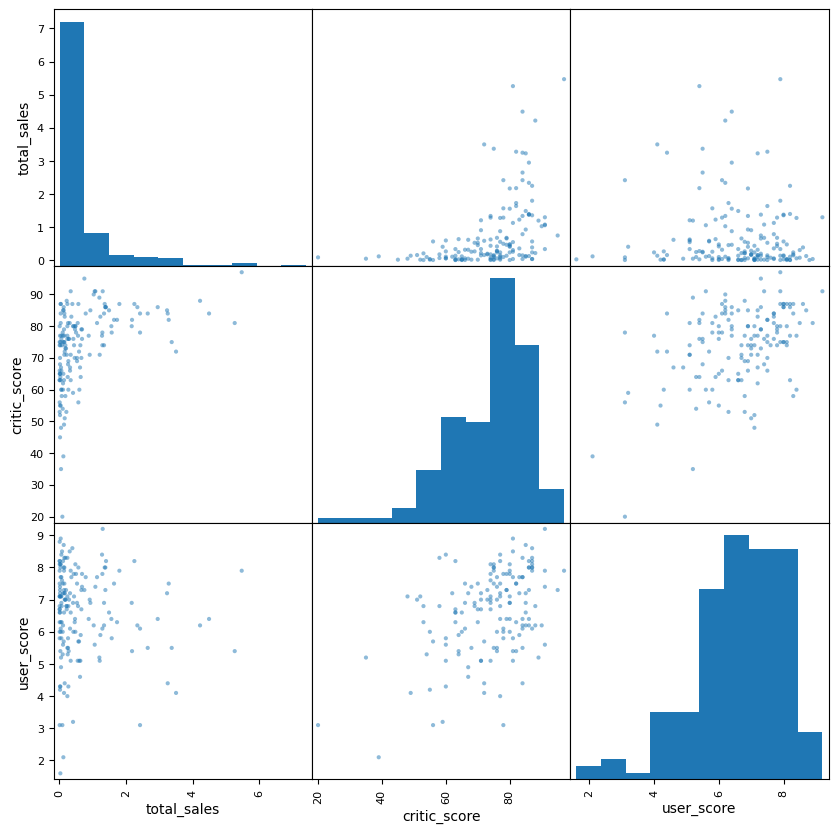

In [38]:
pd.plotting.scatter_matrix(data_xone, figsize=(10, 10));

**PS3**

In [39]:
data_ps3 = relevant_data.query('platform == "PS3"').loc[:,
            ['total_sales', 'critic_score', 'user_score']]
data_ps3.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


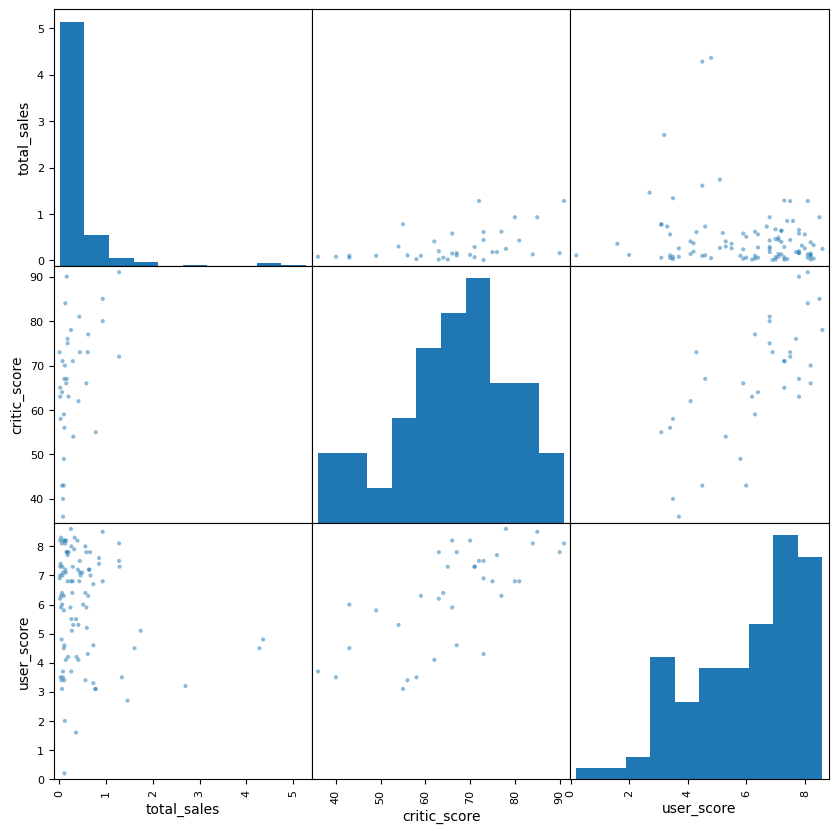

In [40]:
pd.plotting.scatter_matrix(data_ps3, figsize=(10, 10));

**3DS**

In [41]:
data_3ds = relevant_data.query('platform == "3DS"').loc[:,
            ['total_sales', 'critic_score', 'user_score']]
data_3ds.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


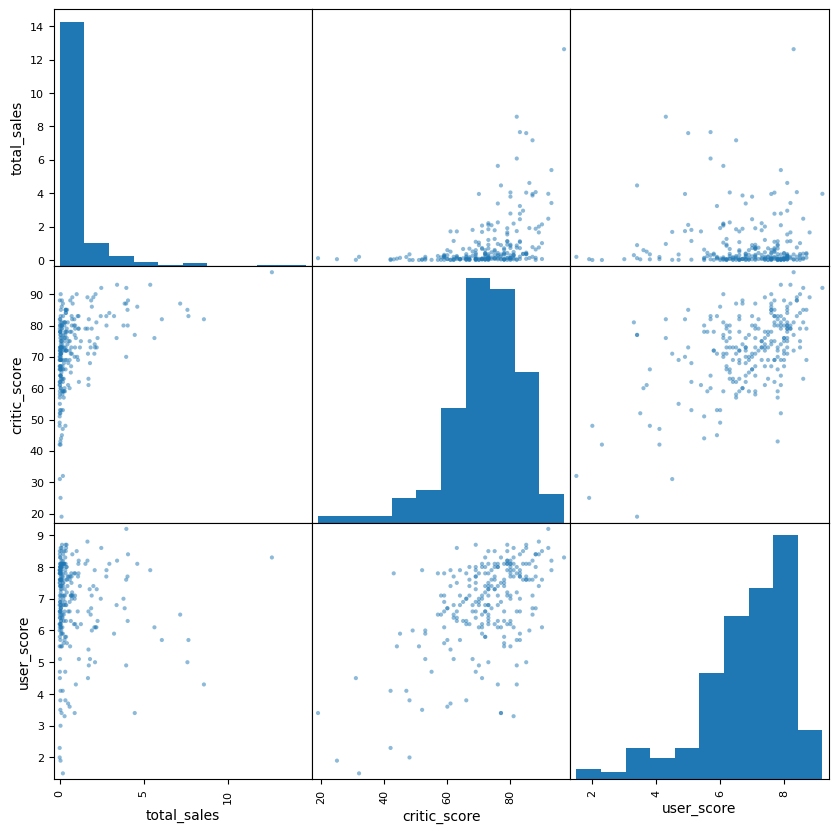

In [42]:
pd.plotting.scatter_matrix(data_ps4, figsize=(10, 10));

**Вывод**:
- На представленных выше платформах есть умеренная корреляция между продажами и оценкой критиков. (`total_sales` & `critic_score`)
- Зависимость между оценками пользователей и продажами (`total_sales` & `user_score`) практически нулевая, но зависимость между оценками пользователей и оценками критиков (`critic_sales` & `user_score`) высокая.

### Распределение игр по жанрам

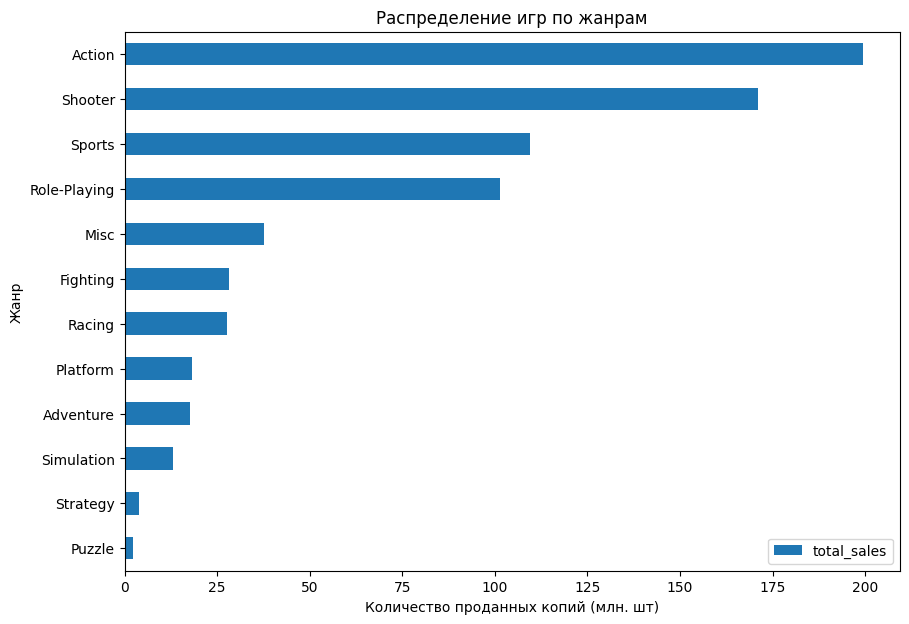

In [43]:
(
relevant_data
    .pivot_table(index='genre', values='total_sales', aggfunc=sum)
    .sort_values(by='total_sales', ascending=True)
    .plot(kind='barh', figsize=(10, 7), title='Распределение игр по жанрам')
)
plt.xlabel('Количество проданных копий (млн. шт)')
plt.ylabel('Жанр');

Из графика видно, что лидерами продаж являются жанры "Action", "Shooter" и "Sports".

На последних местах расположились симуляторы, стратегии и пазлы - у них меньше 25 млн проданных копий.

Опишем данные для каждого жанра

In [44]:
(
    relevant_data.groupby('genre')['total_sales']
    .describe()
    .sort_values(by='mean', ascending=False)
)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63
Sports,161.0,0.680000,1.239736,0.01,0.0600,0.180,0.6400,8.58
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Simulation,44.0,0.298409,0.646925,0.01,0.0200,0.100,0.3275,3.05


Если же смотреть по средним значениям, то первое место занимают "Shooter", "Sports" и "Platform".

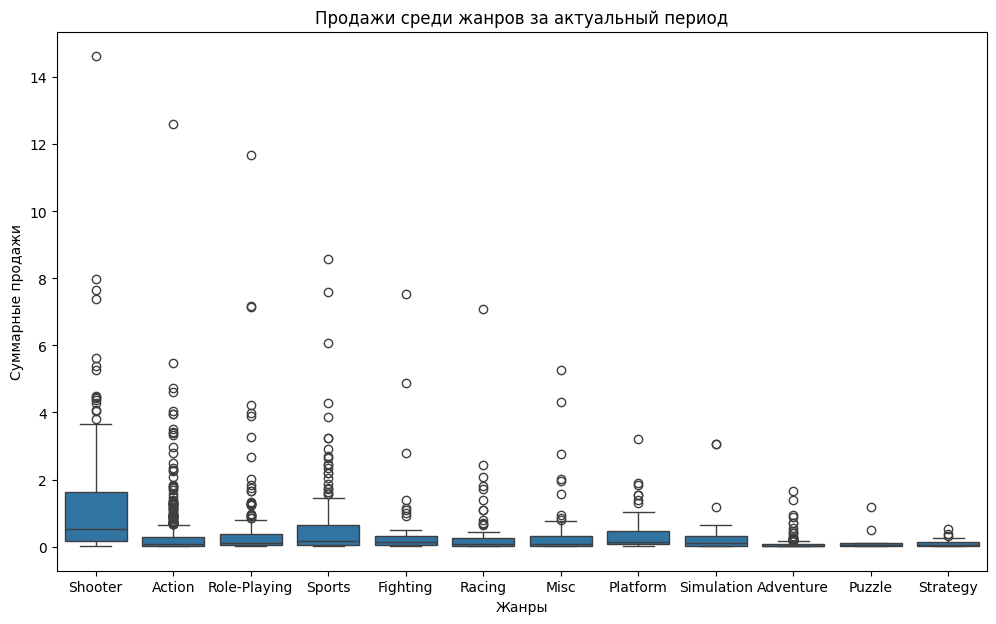

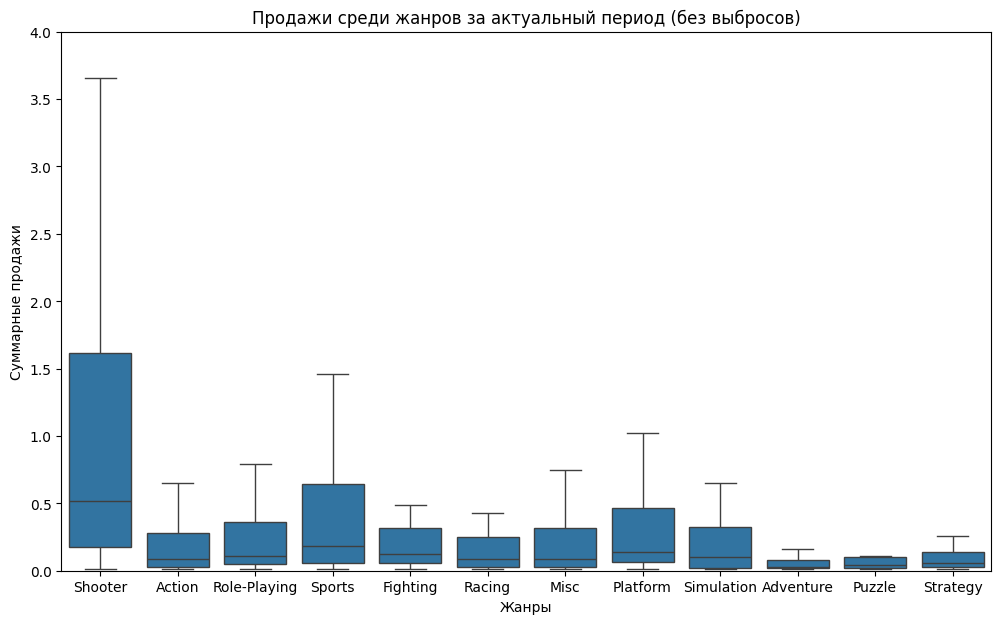

In [45]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=relevant_data, x='genre',  y='total_sales')
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.title('Продажи среди жанров за актуальный период')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(data=relevant_data, x='genre',  y='total_sales', showfliers = False)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.title('Продажи среди жанров за актуальный период (без выбросов)')
plt.ylim(0, 4);

Шутеры имеют самый большой межквартильный размах, превосходящий некоторые в несколько раз

<font size=3> Вывод: </font>

1. Самый доходный период оказался с 2007 по 2010 год - здесь больше всего продаж;
2. Cамые большие продажи за **весь период** оказались у PS2, X360, PS3 и Wii;
3. Отсеяли неактуальные данные (до 2013 года);
4. Лидерами продаж оказались PS4 и XOne, на третьем месте WiiU;
5. Зависимость между продажами и оценками критиков умеренная (с оценками пользователей зависимости нет);
6. Самые популярные жанры: шутеры, платформеры, спортивные, ролевые.

## Портреты пользователей

### Самые популярные платформы в регионах

Нам нужно определить самые популярные платформы по регионам (NA, EU, JP).

**Северная Америка**

In [46]:
platforms_na = (relevant_data
    .pivot_table(index='platform', values='na_sales', aggfunc=sum)
    .sort_values(by='na_sales', ascending=False)
    );
platforms_na

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52
Wii,2.08


В Северной Америке популярна PS4, менее популярен ее конкурент XOne.

Проданных копий у PS4 почти в два раза больше, чем у ее предшественника - PS3.

Внизу рейтинга расположился 3DS - 38 млн проданных копий.

**Европа**

In [47]:
platforms_eu = (relevant_data
    .pivot_table(index='platform', values='eu_sales', aggfunc=sum)
    .sort_values(by='eu_sales', ascending=False)
    );
platforms_eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53
Wii,2.59


В Европе почти похожая ситуация, с той лишь разницей, что японские приставки здесь более популярны. Стоит заметить разрыв в количестве проданных копий на PS4 в Европе и Северной Америке - 141 млн и 108 млн соответсвенно.

**Япония**

In [48]:
platforms_jp = (relevant_data
    .pivot_table(index='platform', values='jp_sales', aggfunc=sum)
    .sort_values(by='jp_sales', ascending=False)
    );
platforms_jp

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
PSP,0.36
XOne,0.32
X360,0.08
PC,0.00


Ситуация в Японии координально отличается:
1. Здесь на первом месте 3DS;
2. На втором PS3;
3. В рейтинг попала WiiU;
4. Все представленные выше платформы - отечественного (для Японии) рынка;
5. Количество проданных копий на 3DS равно количеству проданных копий остальных платформ вместе взятых.

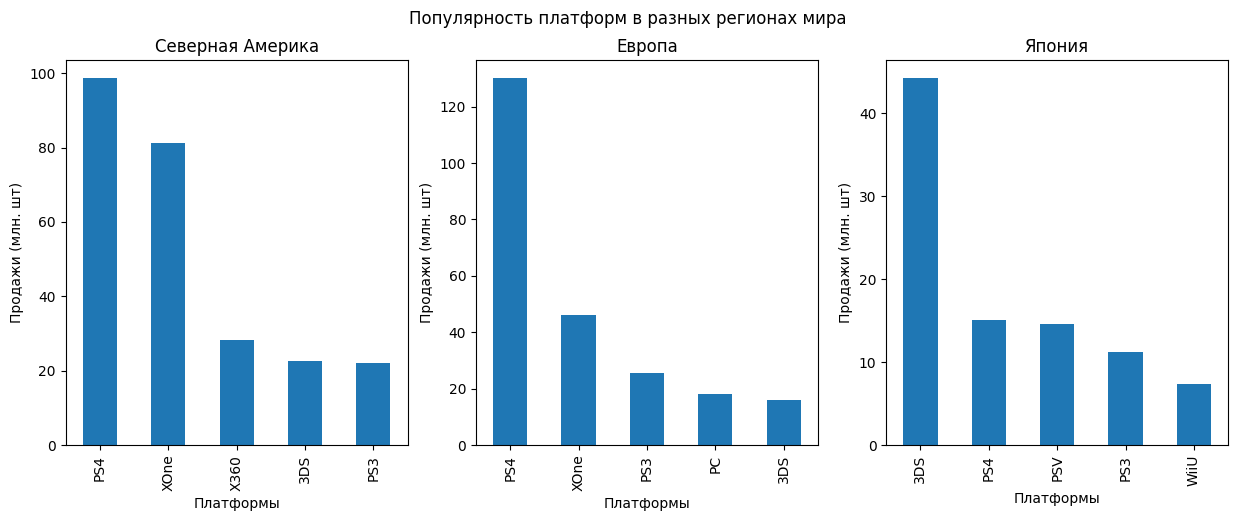

In [49]:
bar1 = plt.subplot(1, 3, 1)
bar2 = plt.subplot(1, 3, 2)
bar3 = plt.subplot(1, 3, 3)
plt.suptitle('Популярность платформ в разных регионах мира')

platforms_na[:5].plot(ax = bar1, kind = "bar", figsize=[15,5], title="Северная Америка", legend=False)
platforms_eu[:5].plot(ax = bar2, kind = "bar", figsize=[15,5], title="Европа", legend=False)
platforms_jp[:5].plot(ax = bar3, kind = "bar", figsize=[15,5], title="Япония", legend=False);

bar1.set_xlabel('Платформы')
bar2.set_xlabel('Платформы')
bar3.set_xlabel('Платформы')

bar1.set_ylabel('Продажи (млн. шт)')
bar2.set_ylabel('Продажи (млн. шт)')
bar3.set_ylabel('Продажи (млн. шт)');

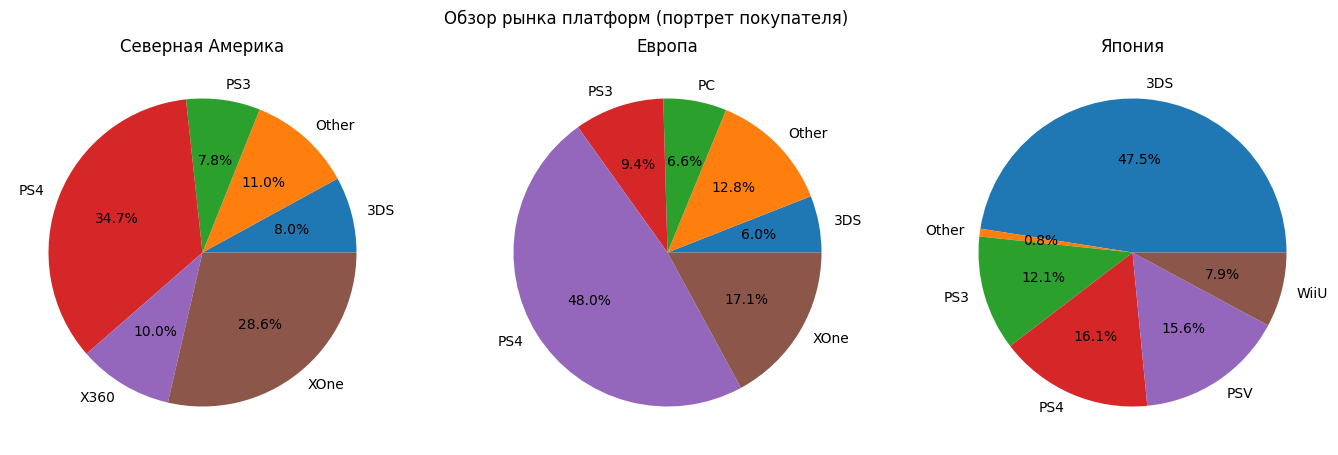

In [50]:
plt.figure(figsize=(17, 5))

pie1 = plt.subplot(1, 3, 1)
pie2 = plt.subplot(1, 3, 2)
pie3 = plt.subplot(1, 3, 3)
plt.suptitle('Обзор рынка платформ (портрет покупателя)')

(relevant_data
 .replace(platforms_na.index[5:], 'Other')
 .groupby('platform')['na_sales']
 .sum()
 .plot(ax=pie1, kind='pie', y='total_sales', autopct='%1.1f%%', title='Северная Америка', ylabel='')
)

(relevant_data
 .replace(platforms_eu.index[5:], 'Other')
 .groupby('platform')['eu_sales']
 .sum()
 .plot(ax=pie2, kind='pie', y='total_sales', autopct='%1.1f%%', title='Европа', ylabel='')
)

(relevant_data
 .replace(platforms_jp.index[5:], 'Other')
 .groupby('platform')['jp_sales']
 .sum()
 .plot(ax=pie3, kind='pie', y='total_sales', autopct='%1.1f%%', title='Япония', ylabel='')
);


### Самые популярные жанры в регионах

Нам нужно определить самые популярные жанры по регионам (NA, EU, JP).

**Северная Америка**

In [51]:
genres_na = (relevant_data
    .pivot_table(index='genre', values='na_sales', aggfunc=sum)
    .sort_values(by='na_sales', ascending=False)
    .head()
    );
genres_na

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


В Северной Америке самыми популярными жанрами являются экшен и шутеры. На 5 месте расположился жанр "Misc". Распределение идет плавно.

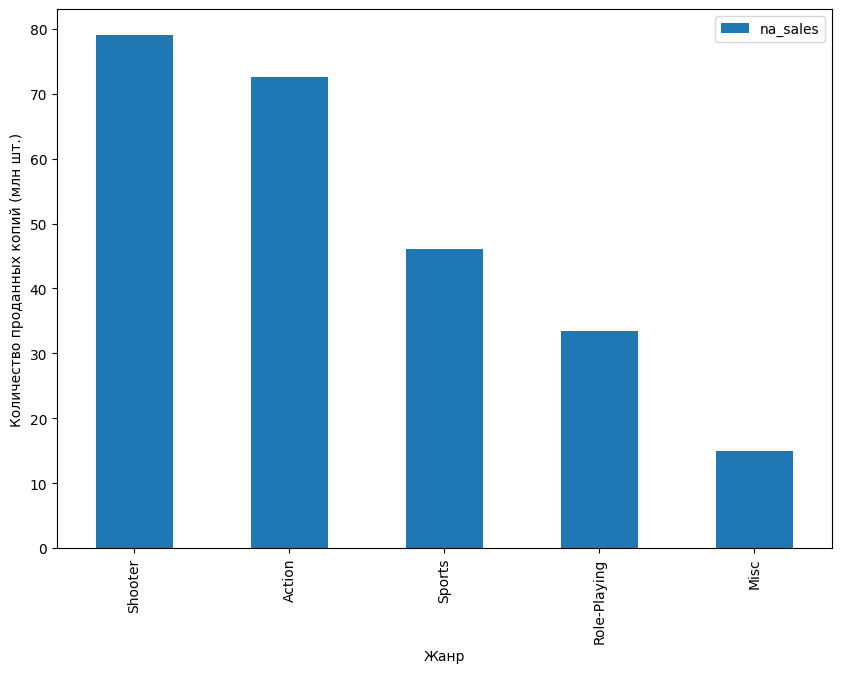

In [52]:
genres_na.plot(kind='bar', figsize=(10, 7),
          xlabel='Жанр', ylabel='Количество проданных копий (млн шт.)');

**Европа**

In [53]:
genres_eu = (relevant_data
    .pivot_table(index='genre', values='eu_sales', aggfunc=sum)
    .sort_values(by='eu_sales', ascending=False)
    .head()
    );
genres_eu

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


Что касается Европы, самые популярные жанры, как и в Америке, экшен и шутеры. Далее идут спортивный, ролевой и гонки.

Между европейцами и американцами много общего, скорее поэтому четыре позиции получились схожими.

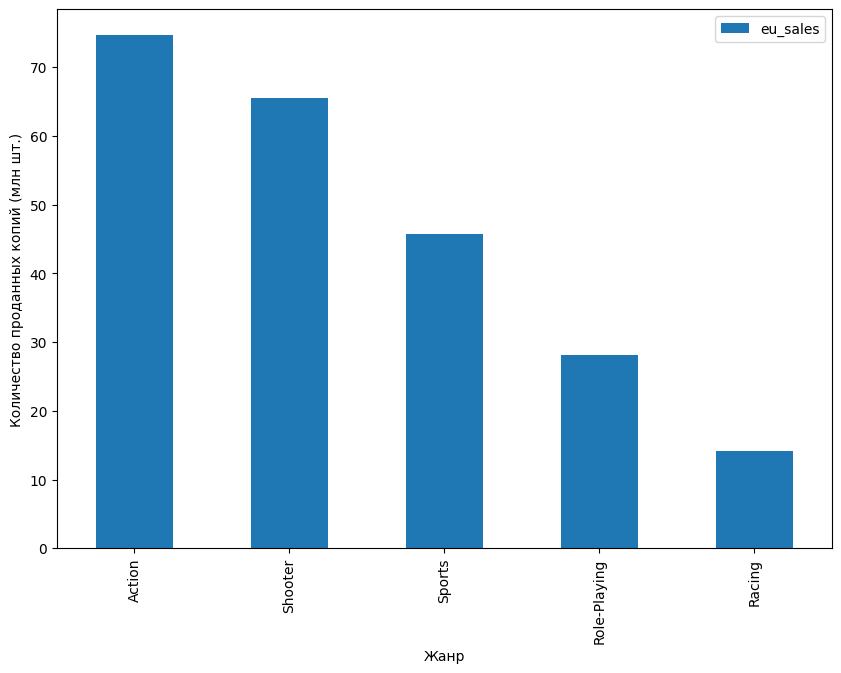

In [54]:
genres_eu.plot(kind='bar', figsize=(10, 7),
          xlabel='Жанр', ylabel='Количество проданных копий (млн шт.)');

**Япония**

In [55]:
genres_jp = (relevant_data
    .pivot_table(index='genre', values='jp_sales', aggfunc=sum)
    .sort_values(by='jp_sales', ascending=False)
    .head()
    );
genres_jp

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Здесь ситуация координально отличается - самый популярный жанр - ролевые игры, и только потом экшен. Далее идут "Misc", "Fighting", а шутеры на последнем месте.

Это похоже на правду, т.к. в Японии ролевые игры очень ценятся аудиторией геймеров.

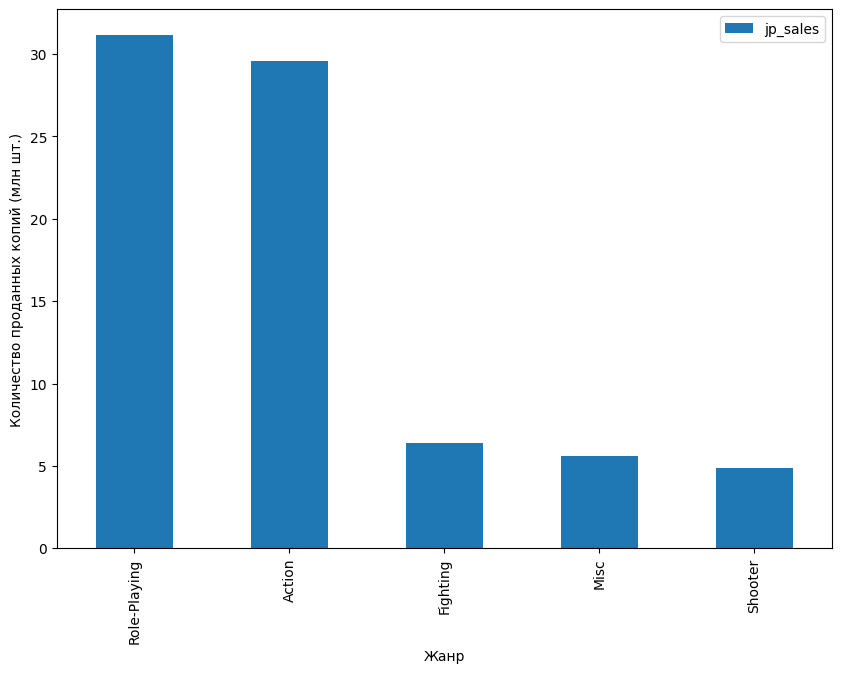

In [56]:
genres_jp.plot(kind='bar', figsize=(10, 7),
          xlabel='Жанр', ylabel='Количество проданных копий (млн шт.)');

### Влияние рейтинга ESRB на продажи в отдельном регионе

Теперь оценим влияние рейтинга ESRB на продажи в регионах (NA, EU, JP).

**Северная Америка**

In [57]:
esrb_na = (relevant_data
    .pivot_table(index='rating', values='na_sales', aggfunc=sum)
    .sort_values(by='na_sales', ascending=False)
    .head()
    );
esrb_na

,na_sales
rating,
M,96.42
no_rating,64.72
E,50.74
T,38.95
E10+,33.23


Лидирует в этом топе рейтинг M (от 17 лет и выше).

Большое количество игр без рейтинга. Скорее всего они не особо популярны, но все же их большое количество.

Далее идет рейтинг E (старше 6 лет), E10+ (старше 10 лет) и T (старше 13 лет)

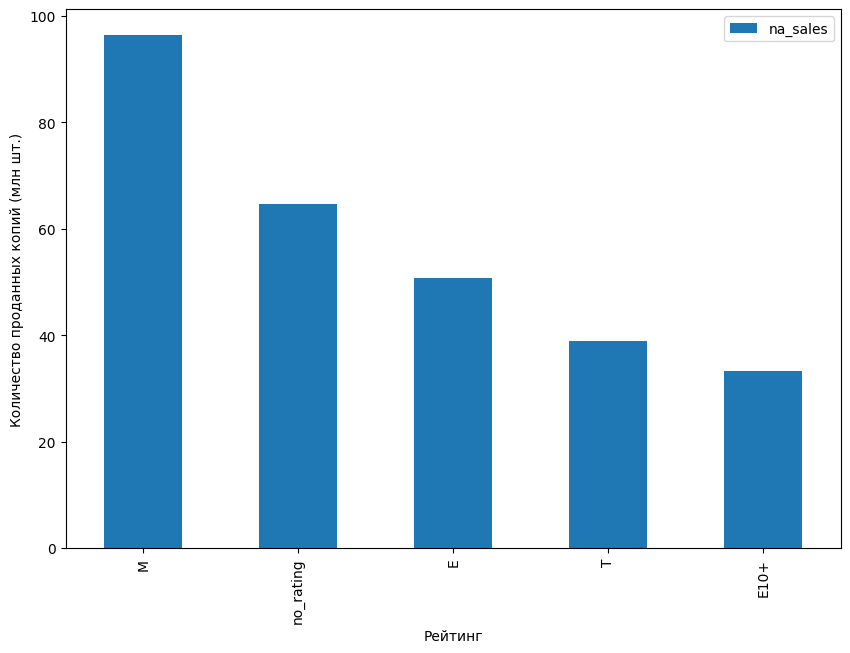

In [58]:
esrb_na.plot(kind='bar', figsize=(10, 7),
          xlabel='Рейтинг', ylabel='Количество проданных копий (млн шт.)');

**Европа**

In [59]:
esrb_eu = (relevant_data
    .pivot_table(index='rating', values='eu_sales', aggfunc=sum)
    .sort_values(by='eu_sales', ascending=False)
    .head()
    );
esrb_eu

,eu_sales
rating,
M,93.44
no_rating,58.95
E,58.06
T,34.07
E10+,26.16


Здесь похожая ситуация, как и с Америкой, с той лишь разнице, что игр рейтинга E больше, чем безрейтинговых.

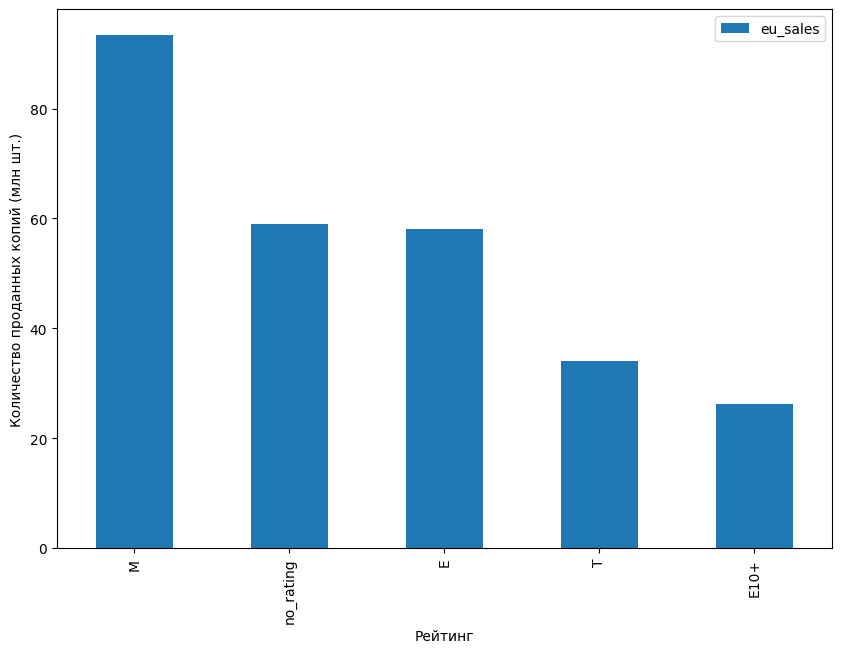

In [60]:
esrb_eu.plot(kind='bar', figsize=(10, 7),
          xlabel='Рейтинг', ylabel='Количество проданных копий (млн шт.)');

**Япония**

In [61]:
esrb_jp = (relevant_data
    .pivot_table(index='rating', values='jp_sales', aggfunc=sum)
    .sort_values(by='jp_sales', ascending=False)
    .head()
    );
esrb_jp

,jp_sales
rating,
no_rating,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Большинство игр без рейтинга. Возможно, в Японии существует другая система сертификации игр.

Далее идет рейтинг T (от 13 лет), E (старше 6 лет), M (старше 17 лет) и E10+ (старше 10 лет).

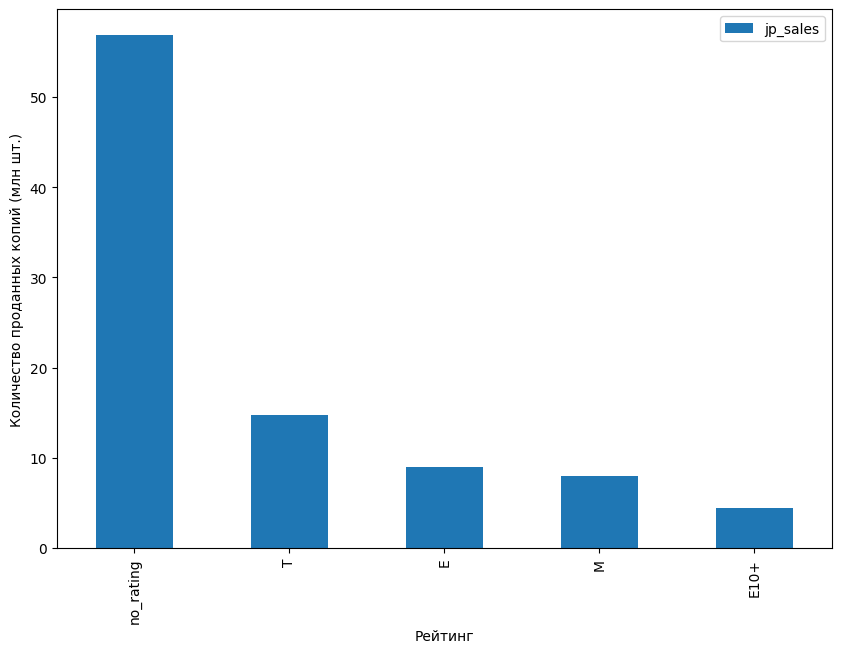

In [62]:
esrb_jp.plot(kind='bar', figsize=(10, 7),
          xlabel='Рейтинг', ylabel='Количество проданных копий (млн шт.)');

<font size=3> Вывод: </font>

1. В Северной Америке геймеры предпочитают играть в экшен и шутеры с рейтингом M (от 17 лет) на PS4, XOne и X360;
2. В Европе геймеры также предпочитают играть в экшен и шутеры с рейтингом M (от 17 лет) на PS4, PS3 и XOne;
3. В Японии ситуация другая - геймеры предпочитают играть в ролевые игры без рейтинга на 3DS, PS3 и PSV.

## Проверка гипотез

### Первая гипотеза

Сформулируем нулевую и альтернативную гипотезы:

H0 - cредние пользовательские рейтинги платформ Xbox One и PC равны;

H1 - cредние пользовательские рейтинги платформ Xbox One и PC не равны.

Соберем данные для двух платформ в отдельные датафреймы

In [63]:
data_xone = relevant_data.query('platform == "XOne" and not user_score.isna()')
data_pc = relevant_data.query('platform == "PC" and not user_score.isna()')

In [64]:
alpha = 0.05

results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'])

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.10450507919348415
Нет оснований отвергнуть нулевую гипотезу


Значение p-value (0.10450507919348415) говорит, что при истинности нулевой гипотезы, т.е. рейтинги двух платформ равны, вероятность того, что наблюдаемые значения различны, равна 10 %

Нулевую гипотезу отвергнуть не удалось, а значит, что пользовательские оценки у данных платформ скорее одинаковые.

In [65]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Вторая гипотеза

Сформулируем нулевую и альтернативную гипотезы:

H0 - средние пользовательские рейтинги жанров Action и Sports равны;

H1 - средние пользовательские рейтинги жанров Action и Sports не равны.

In [66]:
data_action = relevant_data.query('genre == "Action" and not user_score.isna()')
data_sports = relevant_data.query('genre == "Sports" and not user_score.isna()')

In [67]:
alpha = 0.05

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Здесь мы отвергли нулевую гипотезу, значит, средние пользовательские оценки у этих двух жанров разные.

1. Нулевые гипотезы в обоих случаях построил на основании, что средние двух выборок равны, альтернативную - средние двух выборок разные, т.е. двустроннюю.
    - Для первого случая:
        - H0 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые (не отвергнута);

        - H1 - cредние пользовательские рейтинги платформ Xbox One и PC разные.
    - Для второго случая:
        - H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые (отвергнута);
        - H1 - средние пользовательские рейтинги жанров Action и Sports разные.
2. Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используется метод `scipy_stats.ttest_ind()`.

    Уровень статистической значимости `alpha` выбрал 0.05 (5 %)

## Общий вывод

<font size=3> Выводы по каждой главе: </font>

**Загрузка данных**:

Подключены необходимые библиотеки и загружены данные в переменную `data`. В датасете было 16715 строк и 11 столбцов.

**Предобработка данных**:
1. Названия всех столбов привели к нижнему регистру;
2. Обработали пропуски в столбцах `name` и `year_of_release`;
3. Преобразовали типы данных в столбцах `year_of_release`, `critic_score`, `user_score`;
4. Дубликаты удалены;
5. Добавили новый столбец `total_sales` - общее количество продаж.

**Исследовательский анализ**:
1. Самый доходный период оказался с 2007 по 2010 год - здесь больше всего продаж;
2. Самыми популярными платформами оказались PS2, X360, PS3 и Wii;
3. Оставлены только актуальные данные (с 2013 года);
4. Лидерами продаж по актуальным данным оказались PS4, PS3 и XOne;
5. Зависимость между продажами и оценками критиков умеренная (с оценками пользователей зависимости нет);
6. Самые популярные жанры: экшн, шутеры, спортивные, ролевые.

**Портреты пользователей**
1. В Северной Америке геймеры предпочитают играть в экшен и шутеры с рейтингом M (от 17 лет) на PS4, XOne и X360;
2. В Европе геймеры также предпочитают играть в экшен и шутеры с рейтингом M (от 17 лет) на PS4, PS3 и XOne;
3. В Японии ситуация другая - геймеры предпочитают играть в ролевые игры без рейтинга на 3DS, PS3 и PSV.

**Проверка гипотез**

Сформулирована нулевая гипотеза "*cредние пользовательские рейтинги платформ Xbox One и PC одинаковые*". По результатам теста, оснований отвергнуть ее в пользу альтернативной не оказалось.

Также сформулирована другая нулевая гипотеза "*средние пользовательские рейтинги жанров Action и Sports одинаковые*". Она была отвергнута в пользу альтернативной.

<font size=3> Рекомендации </font>

1. Сделать акцент на продаже игр на платформах нового поколения, т.е. PS4, XOne. Для Японии сделать акцент на 3DS;
2. Упор на игры жанра Action и Shooter в Америке и Европе рейтинга M, в Японии упор на ролевые игры и экшен;
3. Также, узнать о внутренних организациях сертификации игр в Японии.